In [192]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 12)

from sklearn import linear_model, cross_validation
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [193]:
df = pd.read_csv("titanic-train.csv")

In [194]:
df

,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PassengerId
0,1302,1,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,23.0,0,1,11767,83.1583,C,1302
1,17,0,3,"van Billiard, Master. Walter John",male,11.5,1,1,A/5. 851,14.5000,S,17
2,1049,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,S,1049
3,388,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,S,388
4,1060,1,2,"Davis, Miss. Mary",female,28.0,0,0,237668,13.0000,S,1060
...,...,...,...,...,...,...,...,...,...,...,...,...
868,382,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.1250,Q,382
869,529,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,113792,26.5500,S,529
870,1215,1,1,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",female,43.0,1,0,11778,55.4417,C,1215
871,923,1,2,"Brown, Miss. Edith Eileen",female,15.0,0,2,29750,39.0000,S,923


In [195]:
df.columns

Index([u'Unnamed: 0', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Embarked', u'PassengerId'],
      dtype='object')

In [196]:
df = df.drop(['Unnamed: 0', 'Name','Ticket','PassengerId'], axis = 1)

In [197]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,23.0,0,1,83.1583,C
1,0,3,male,11.5,1,1,14.5000,S
2,1,1,male,50.0,2,0,133.6500,S
3,1,3,male,31.0,0,0,7.9250,S
4,1,2,female,28.0,0,0,13.0000,S
...,...,...,...,...,...,...,...,...
868,0,3,male,8.0,4,1,29.1250,Q
869,0,1,male,56.0,0,0,26.5500,S
870,1,1,female,43.0,1,0,55.4417,C
871,1,2,female,15.0,0,2,39.0000,S


In [198]:
df['Female'] = df.Sex.apply(lambda x:1 if x =="female" else 0)

In [199]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Female
0,1,1,female,23.0,0,1,83.1583,C,1
1,0,3,male,11.5,1,1,14.5000,S,0
2,1,1,male,50.0,2,0,133.6500,S,0
3,1,3,male,31.0,0,0,7.9250,S,0
4,1,2,female,28.0,0,0,13.0000,S,1


In [200]:
df = df.drop(['Sex'], axis = 1)

In [201]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Female
0,1,1,23.0,0,1,83.1583,C,1
1,0,3,11.5,1,1,14.5000,S,0
2,1,1,50.0,2,0,133.6500,S,0
3,1,3,31.0,0,0,7.9250,S,0
4,1,2,28.0,0,0,13.0000,S,1
...,...,...,...,...,...,...,...,...
868,0,3,8.0,4,1,29.1250,Q,0
869,0,1,56.0,0,0,26.5500,S,0
870,1,1,43.0,1,0,55.4417,C,1
871,1,2,15.0,0,2,39.0000,S,1


In [202]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Female
Survived,1.000000,-0.338951,-0.034977,-0.012812,0.107791,0.257220,0.527721
Pclass,-0.338951,1.000000,-0.377474,0.064589,0.000924,-0.557365,-0.131005
Age,-0.034977,-0.377474,1.000000,-0.262496,-0.161495,0.139542,-0.078594
SibSp,-0.012812,0.064589,-0.262496,1.000000,0.358425,0.136756,0.157401
Parch,0.107791,0.000924,-0.161495,0.358425,1.000000,0.189630,0.272585
Fare,0.257220,-0.557365,0.139542,0.136756,0.189630,1.000000,0.166503
Female,0.527721,-0.131005,-0.078594,0.157401,0.272585,0.166503,1.000000


In [203]:
Embarked_df = pd.get_dummies(df.Embarked, prefix = 'Embarked')

df = df.join(Embarked_df)

In [204]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Female,Embarked_C,Embarked_Q,Embarked_S
0,1,1,23.0,0,1,83.1583,C,1,1,0,0
1,0,3,11.5,1,1,14.5000,S,0,0,0,1
2,1,1,50.0,2,0,133.6500,S,0,0,0,1
3,1,3,31.0,0,0,7.9250,S,0,0,0,1
4,1,2,28.0,0,0,13.0000,S,1,0,0,1


In [205]:
df = df.drop(['Embarked'], axis = 1)

In [206]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Female,Embarked_C,Embarked_Q,Embarked_S
0,1,1,23.0,0,1,83.1583,1,1,0,0
1,0,3,11.5,1,1,14.5000,0,0,0,1
2,1,1,50.0,2,0,133.6500,0,0,0,1
3,1,3,31.0,0,0,7.9250,0,0,0,1
4,1,2,28.0,0,0,13.0000,1,0,0,1


In [207]:
df.isnull().sum()

Survived        0
Pclass          0
Age           172
SibSp           0
Parch           0
Fare            1
Female          0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [208]:
df = df.dropna()

In [209]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Female,Embarked_C,Embarked_Q,Embarked_S
0,1,1,23.0,0,1,83.1583,1,1,0,0
1,0,3,11.5,1,1,14.5000,0,0,0,1
2,1,1,50.0,2,0,133.6500,0,0,0,1
3,1,3,31.0,0,0,7.9250,0,0,0,1
4,1,2,28.0,0,0,13.0000,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
868,0,3,8.0,4,1,29.1250,0,0,1,0
869,0,1,56.0,0,0,26.5500,0,0,0,1
870,1,1,43.0,1,0,55.4417,1,1,0,0
871,1,2,15.0,0,2,39.0000,1,0,0,1


In [210]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Female,Embarked_C,Embarked_Q,Embarked_S
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.420000,2.212857,29.516548,0.504286,0.432857,35.592214,0.384286,0.192857,0.044286,0.760000
std,0.493911,0.841761,14.218020,0.910114,0.825076,54.090130,0.486774,0.394824,0.205876,0.427389
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000,34.444800,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,76.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


Survived
0    [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
1    [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
dtype: object

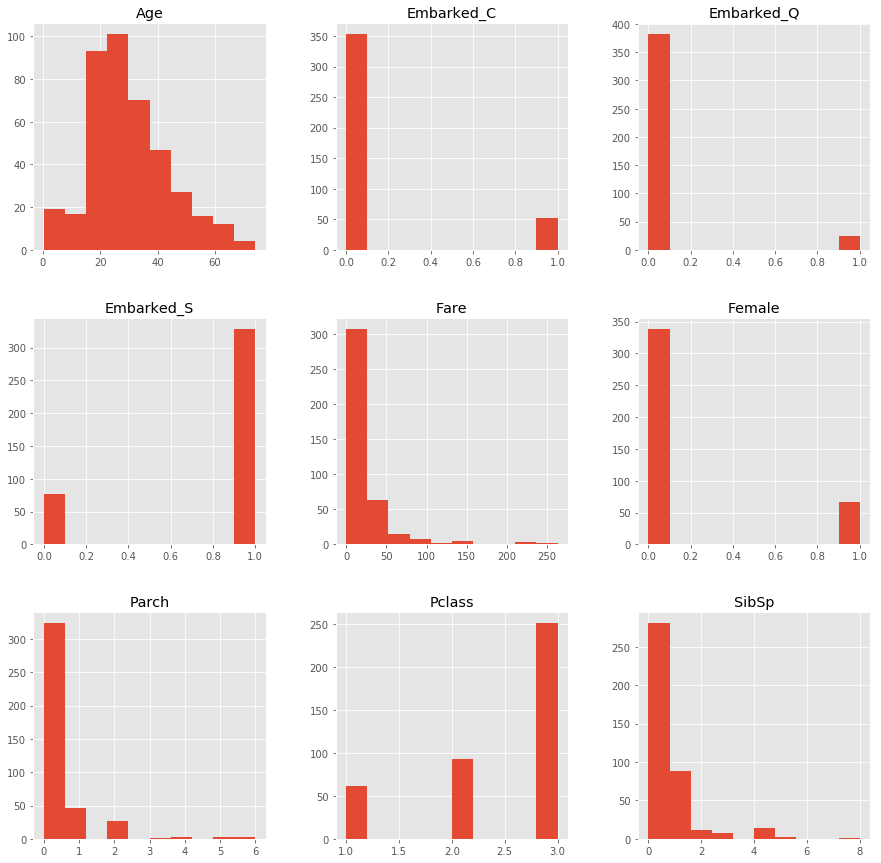

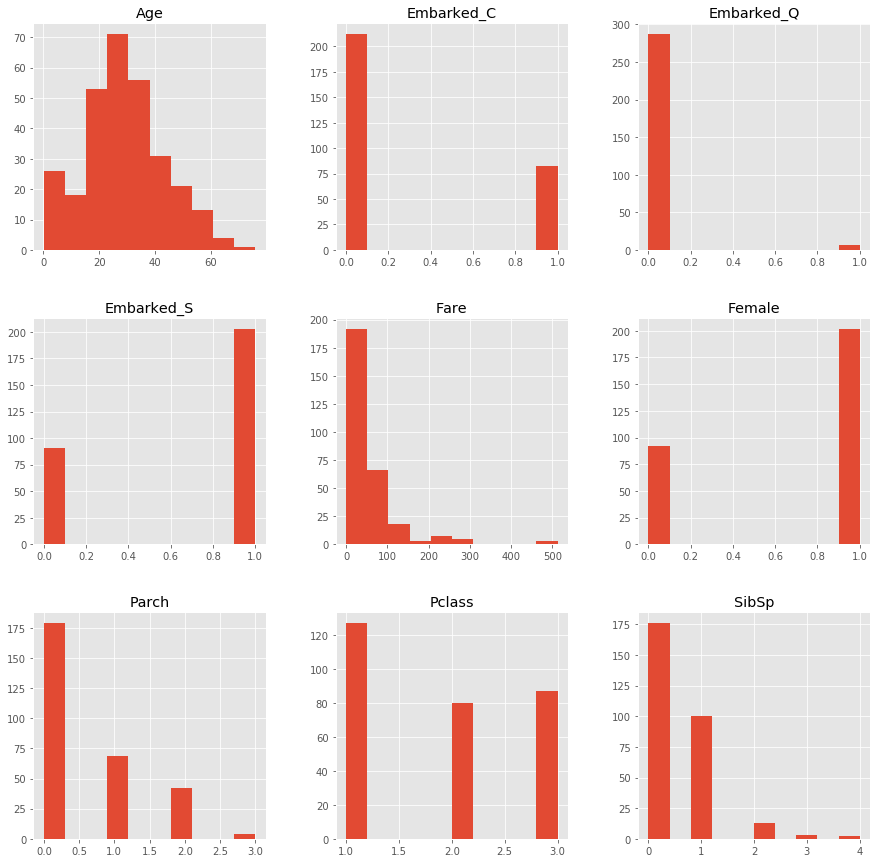

In [211]:
df.groupby('Survived').hist(figsize = (15,15))

Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

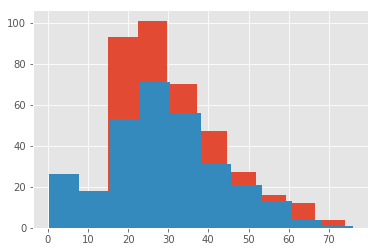

In [212]:
df.groupby('Survived').Age.hist()

In [213]:
df.groupby('Survived').count()

,Pclass,Age,SibSp,Parch,Fare,Female,Embarked_C,Embarked_Q,Embarked_S
Survived,,,,,,,,,
0,406,406,406,406,406,406,406,406,406
1,294,294,294,294,294,294,294,294,294


In [214]:
df.groupby('Survived').Age.count()

Survived
0    406
1    294
Name: Age, dtype: int64

## Build Model

In [215]:
## do log, not linear regression because it's not continous

In [216]:
model = smf.ols(formula = 'Survived ~ Age + Pclass + Female', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     134.6
Date:                Wed, 24 May 2017   Prob (F-statistic):           9.28e-69
Time:                        21:03:37   Log-Likelihood:                -338.86
No. Observations:                 700   AIC:                             685.7
Df Residuals:                     696   BIC:                             703.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7828      0.070     11.195      0.000         0.645     0.920
Age           -0.0042      0.001     -3.658      0.000        -0.006    -0.002
Pclass        -0.1907      0.020     -9.751      0.000        -0.229    -0.152
Female         0.4760      0.031     15.188      0.000         0.414     0.538
==============================================================================
Omnibus:                       24.144   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.117
Skew:                           0.470   Prob(JB):                     2.13e-06
Kurtosis:                       2.888   Cond. No.                         161.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [217]:
X = df.columns.tolist()

In [218]:
X

['Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Female',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [219]:
X = df[[
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Female',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']]

In [220]:
X

,Pclass,Age,SibSp,Parch,Fare,Female,Embarked_C,Embarked_Q,Embarked_S
0,1,23.0,0,1,83.1583,1,1,0,0
1,3,11.5,1,1,14.5000,0,0,0,1
2,1,50.0,2,0,133.6500,0,0,0,1
3,3,31.0,0,0,7.9250,0,0,0,1
4,2,28.0,0,0,13.0000,1,0,0,1
...,...,...,...,...,...,...,...,...,...
868,3,8.0,4,1,29.1250,0,0,1,0
869,1,56.0,0,0,26.5500,0,0,0,1
870,1,43.0,1,0,55.4417,1,1,0,0
871,2,15.0,0,2,39.0000,1,0,0,1


In [221]:
c = df.Survived

In [222]:
model = linear_model.LogisticRegression().fit(X, c)

print model.coef_
print model.intercept_

[[-0.89663774 -0.02663484 -0.38274726  0.03862191  0.00284294  2.46496291
   0.76871933 -0.48707978  0.40033399]]
[ 1.0392427]


In [223]:
model.score(X, c)

0.78285714285714281

In [224]:
logit_hat = model.intercept_ + (X * model.coef_[0]).sum(axis = 1)

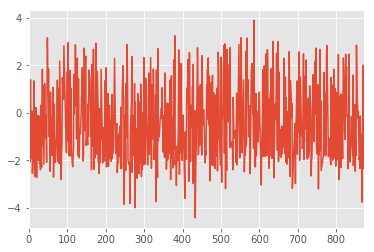

In [225]:
logit_hat.plot() #forced to a normal distribution

In [226]:
odds_hat = np.exp(logit_hat)

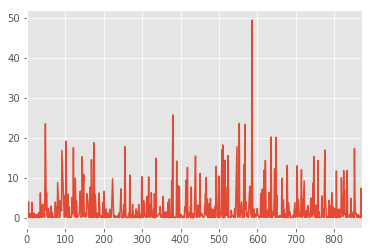

In [227]:
odds_hat.plot()

In [228]:
p_hat = odds_hat / (1 + odds_hat)

In [229]:
p_hat

0      0.954293
1      0.134757
2      0.236072
3      0.113701
4      0.802572
         ...   
868    0.022745
869    0.294603
870    0.881411
871    0.869876
872    0.089457
dtype: float64

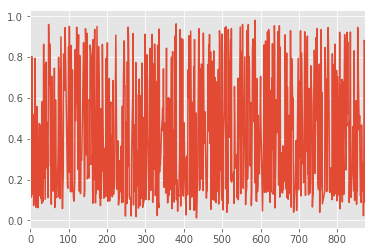

In [230]:
p_hat.plot()

In [231]:
c_hat = p_hat.round()

In [232]:
c_hat #did the person die or not?

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
868    0.0
869    0.0
870    1.0
871    1.0
872    0.0
dtype: float64

In [233]:
(c_hat == c).sum() # 548 predictions correct confusion matrix

548

In [234]:
pd.crosstab(c_hat,
            c,
            rownames = ['Predicted'],
            colnames = ['Actual'])

Actual,0,1
Predicted,,
0.0,345,91
1.0,61,203


In [235]:
# correctly predicted 345 people died. 61 people died, but we said they lived.
# 91 people lived, we said they died. 203 people lived, and we predicted those 203 people lived.


In [236]:
df2 = pd.read_csv("titanic-test.csv")

In [237]:
df2

,Unnamed: 0,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PassengerId
0,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,S,0
1,2,3,"Danoff, Mr. Yoto",male,27.0,0,0,349219,7.8958,S,2
2,4,2,"Jefferys, Mr. Clifford Thomas",male,24.0,2,0,C.A. 31029,31.5000,S,4
3,6,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,S,6
4,12,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,C,12
...,...,...,...,...,...,...,...,...,...,...,...
431,1293,3,"Nieminen, Miss. Manta Josefina",female,29.0,0,0,3101297,7.9250,S,1293
432,1297,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,S,1297
433,1298,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,C,1298
434,1301,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9000,S,1301


In [238]:
df2 = df2.drop(['Unnamed: 0', 'Name','Ticket','PassengerId'], axis = 1)

In [239]:
df2['Female'] = df2.Sex.apply(lambda x:1 if x =="female" else 0)

In [240]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Female
0,2,male,NaN,0,0,0.0000,S,0
1,3,male,27.0,0,0,7.8958,S,0
2,2,male,24.0,2,0,31.5000,S,0
3,3,female,NaN,8,2,69.5500,S,1
4,1,male,32.0,0,0,30.5000,C,0


In [241]:
df2 = df2.drop(['Sex'], axis = 1)

In [242]:
Embarked_df2 = pd.get_dummies(df2.Embarked, prefix = 'Embarked')

df2 = df2.join(Embarked_df2)


In [243]:
df2 = df2.drop(['Embarked'], axis = 1)

In [244]:
df2 = df2.dropna()

In [245]:
df2.head()

,Pclass,Age,SibSp,Parch,Fare,Female,Embarked_C,Embarked_Q,Embarked_S
1,3,27.0,0,0,7.8958,0,0,0,1
2,2,24.0,2,0,31.5000,0,0,0,1
4,1,32.0,0,0,30.5000,0,1,0,0
5,2,51.0,0,0,12.5250,0,0,0,1
6,3,31.0,0,0,7.7333,0,0,1,0


In [246]:
X2 = df2.columns.tolist()

In [247]:
X2

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Female',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [248]:
X2 = df2[[
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Female',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']]

In [249]:
X2

,Pclass,Age,SibSp,Parch,Fare,Female,Embarked_C,Embarked_Q,Embarked_S
1,3,27.0,0,0,7.8958,0,0,0,1
2,2,24.0,2,0,31.5000,0,0,0,1
4,1,32.0,0,0,30.5000,0,1,0,0
5,2,51.0,0,0,12.5250,0,0,0,1
6,3,31.0,0,0,7.7333,0,0,1,0
...,...,...,...,...,...,...,...,...,...
431,3,29.0,0,0,7.9250,1,0,0,1
432,2,30.0,3,0,21.0000,1,0,0,1
433,1,50.0,0,1,247.5208,1,1,0,0
434,3,9.0,5,2,46.9000,0,0,0,1


In [250]:
predicted_test = model.predict(X2)

In [251]:
print predicted_test

[0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1
 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0
 0 0 0 0 1 1 0 1 1 1 0 0]


In [253]:
df2['survival_prediction'] = predicted_test

In [254]:
df2

,Pclass,Age,SibSp,Parch,Fare,Female,Embarked_C,Embarked_Q,Embarked_S,survival_prediction
1,3,27.0,0,0,7.8958,0,0,0,1,0
2,2,24.0,2,0,31.5000,0,0,0,1,0
4,1,32.0,0,0,30.5000,0,1,0,0,1
5,2,51.0,0,0,12.5250,0,0,0,1,0
6,3,31.0,0,0,7.7333,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
431,3,29.0,0,0,7.9250,1,0,0,1,1
432,2,30.0,3,0,21.0000,1,0,0,1,1
433,1,50.0,0,1,247.5208,1,1,0,0,1
434,3,9.0,5,2,46.9000,0,0,0,1,0
